Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


164/164 ━━━━━━━━━━━━━━━━━━━━ 147s 859ms/step - accuracy: 0.7381 - loss: 0.5743 - val_accuracy: 0.8061 - val_loss: 0.4327
Epoch 2/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 144s 859ms/step - accuracy: 0.8495 - loss: 0.3348 - val_accuracy: 0.8718 - val_loss: 0.3430
Epoch 3/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 131s 773ms/step - accuracy: 0.8554 - loss: 0.3193 - val_accuracy: 0.8670 - val_loss: 0.3613
Epoch 4/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 131s 784ms/step - accuracy: 0.8793 - loss: 0.2671 - val_accuracy: 0.8894 - val_loss: 0.3320
Epoch 5/5
164/164 ━━━━━━━━━━━━━━━━━━━━ 144s 862ms/step - accuracy: 0.8889 - loss: 0.2629 - val_accuracy: 0.8830 - val_loss: 0.2957


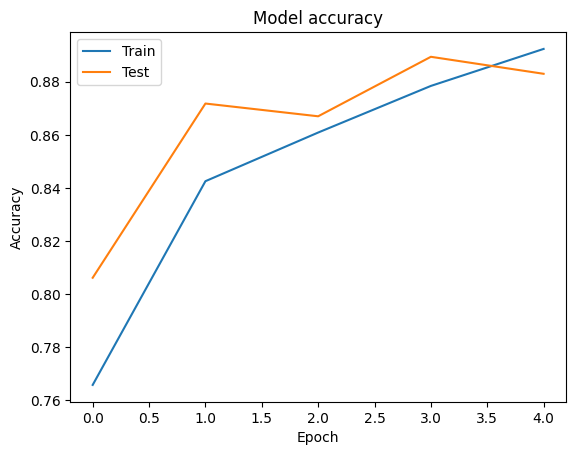

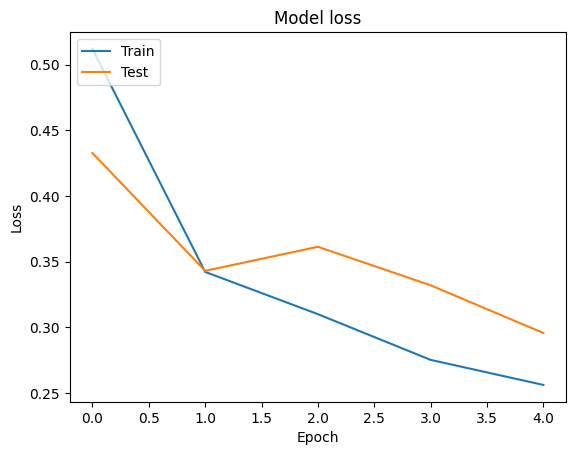

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define paths to dataset
train_dir = r'D:\AI-Projects\chest_xray\train'
test_dir = r'D:\AI-Projects\chest_xray\test'


# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator,
    callbacks=[early_stopping]
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Save the model
model.save('pneumonia_detection_model.h5')
